In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

%pylab inline
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv("train.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
# Using .info and .describe to aquire further details of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Brief Description**

The dataset chosen for this project is the famous titanic dataset used to predict whether a person will or has survived the titanic accident. The dataset contains 11 columns and 418 rows in total. 6 of those columns contain integers and floats while the remaining 5 contain objects. Name, age, sex and pclass contains the names, age, sex, and ticket class of the passengers onboard respectively. cabin is the cabin number, ticket is the ticket number, passengerid contains identification number of each passenger, sibsp contains the number of siblings or spouse aboard, parch contains the parents of children and embarked deals with port of boarding. Age, Fare and Cabin are the only columns containing null values or spaces.



**Initial plan for data exploration**

Powerful tools such as matplotlib, pandas and seaborn would used for data exploration and having that initial conversation wisth our dataset. Pairplot, jointplot, kdeplot and distplot to have a better understanding of the dataset and finding outliers. Passengerid, Cabin, Fare, Ticket, Embarked and Names would be droped as they are of less significance to meeting our target which is to predict if a person will or has survived the titanic accident or not.

In [ ]:
data.drop(['Cabin', 'Fare', 'PassengerId', 'Embarked', 'Ticket', 'Name'], axis=1, inplace = True)

In [ ]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3    male  22.0      1      0
1         1       1  female  38.0      1      0
2         1       3  female  26.0      0      0
3         1       1  female  35.0      1      0
4         0       3    male  35.0      0      0

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [ ]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data.groupby('Survived').count()

Pclass  Sex  Age  SibSp  Parch
Survived                                
0            549  549  424    549    549
1            342  342  290    342    342

In [ ]:
data.groupby('Pclass').count()

Survived  Sex  Age  SibSp  Parch
Pclass                                  
1            216  216  186    216    216
2            184  184  173    184    184
3            491  491  355    491    491

In [ ]:
# Calculation of mean and median grouped by sex
data.groupby('Sex').mean()
data.groupby('Sex').median()

Survived  Pclass   Age  SibSp  Parch
Sex                                         
female       1.0     2.0  27.0    0.0    0.0
male         0.0     3.0  29.0    0.0    0.0

In [ ]:
# Calculation of mean and median grouped by Survived
data.groupby('Survived').mean()
data.groupby('Survived').median()

Pclass   Age  SibSp  Parch
Survived                            
0            3.0  28.0    0.0    0.0
1            2.0  28.0    0.0    0.0

In [ ]:
median = data['Age'].median()
median

28.0

In [ ]:
data.fillna(median, inplace=True)

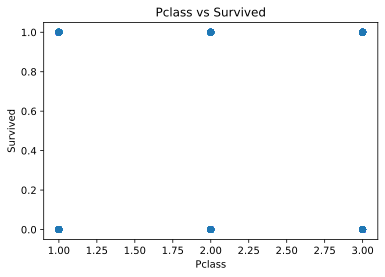

In [ ]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.Pclass, data.Survived)

# Label the axes
ax.set(xlabel='Pclass',
       ylabel='Survived',
       title='Pclass vs Survived');

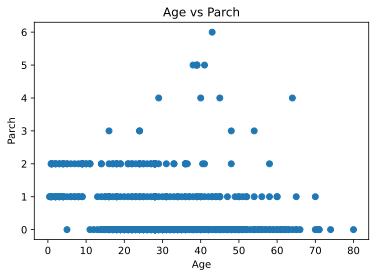

In [ ]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.Age, data.Parch)

# Label the axes
ax.set(xlabel='Age',
       ylabel='Parch',
       title='Age vs Parch');

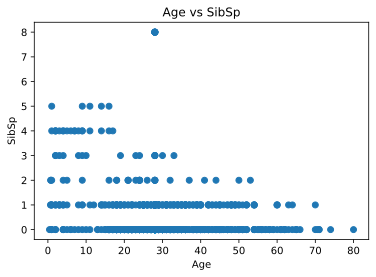

In [ ]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.Age, data.SibSp)

# Label the axes
ax.set(xlabel='Age',
       ylabel='SibSp',
       title='Age vs SibSp');

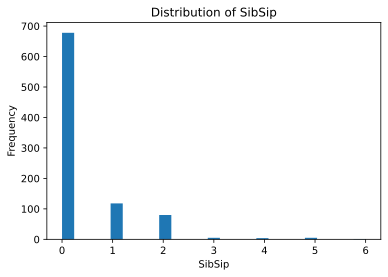

In [ ]:
ax = data.Parch.plot.hist(bins=25)

ax.set(xlabel='SibSip',
       ylabel='Frequency',
       title='Distribution of SibSip');

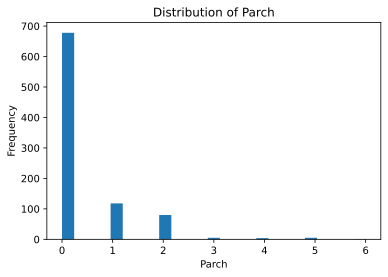

In [ ]:
ax = data.Parch.plot.hist(bins=25)

ax.set(xlabel='Parch',
       ylabel='Frequency',
       title='Distribution of Parch');

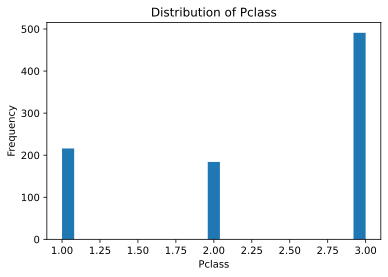

In [ ]:
ax = data.Pclass.plot.hist(bins=25)

ax.set(xlabel='Pclass',
       ylabel='Frequency',
       title='Distribution of Pclass');

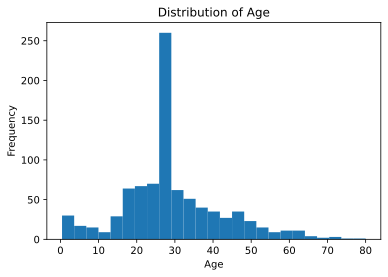

In [ ]:
ax = data.Age.plot.hist(bins=25)

ax.set(xlabel='Age',
       ylabel='Frequency',
       title='Distribution of Age');

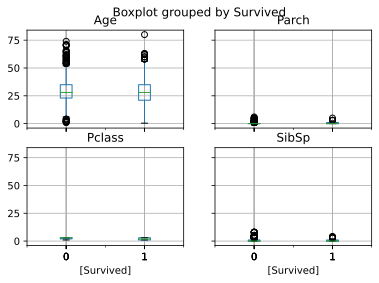

In [ ]:
data.boxplot(by='Survived',);

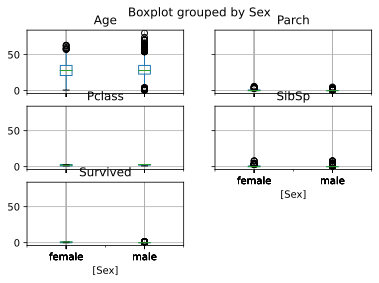

In [ ]:
data.boxplot(by='Sex');

In [ ]:
sns.set_context('talk')
sns.pairplot(data, hue='Sex');

In [ ]:
sns.set_context('talk')
sns.pairplot(data, hue='Survived');

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890     True
Length: 891, dtype: bool

In [ ]:
data.drop_duplicates()

Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3    male  22.0      1      0
1           1       1  female  38.0      1      0
2           1       3  female  26.0      0      0
3           1       1  female  35.0      1      0
4           0       3    male  35.0      0      0
..        ...     ...     ...   ...    ...    ...
880         1       2  female  25.0      0      1
885         0       3  female  39.0      0      5
887         1       1  female  19.0      0      0
888         0       3  female  28.0      1      2
889         1       1    male  26.0      0      0

[519 rows x 6 columns]

In [ ]:
from sklearn import preprocessing
labelencoding=preprocessing.LabelEncoder()
data["Sex"]=labelencoding.fit_transform(data["Sex"].astype(str))
data.head(5)

Survived  Pclass  Sex   Age  SibSp  Parch
0         0       3    1  22.0      1      0
1         1       1    0  38.0      1      0
2         1       3    0  26.0      0      0
3         1       1    0  35.0      1      0
4         0       3    1  35.0      0      0

**Key Findings**

Some of the key findings for this dataset include, most of the passengers onboard are of 28-30 years of age and 70-80 years having a lesser number. Persons with third class ticket are having a higher number that both first and second. Those with a single siblings, spouse or kids onboard with are having the most distribution with both having not more than 6 onboard. In both instances, those with 1 onboard are child or spouse/sibling are the majority. Men survived the most in general but men died the most in terms of those with children.

**Hypothesis**

1

Null: All those with children died

Alternative: Not all with children died

2

Null: All men survived

Alternative: Not all men survived

3

Null: All those in first-class survived

Alternative: Not all in first-class survived



In [ ]:
data.groupby('Survived')['Parch'].value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Parch, dtype: int64

In [ ]:
from scipy.stats import binom
print(1 - binom.cdf(104, 891, 0.95))

1.0


In [ ]:
print(binom.ppf(0.95, 213, 0.5)+1)

119.0


Null: All those with children died
Alternative: Not all with children died

Explanation:
For us to say all those with kids died on the titanic crash with 95% confidence, we need about 119 but what we got from our data was 104. So, we can safely reject the null in favour of the alternative hypothesis.

Suggestions for next step would include further feature engineering and correletiona detection.

The dataset used for this project is very qualitative with few blanks and zero outliers. when it comes to datasets, more is always better but the volume of this dataset would suffice to predict the target variable.
